<a href="https://colab.research.google.com/github/MASOC24/ChatBot/blob/main/Crypto_Currency_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install scikit-learn
!pip install tensorflow
!pip install statsmodels

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime, timedelta

#Download Historical Data for Top 30 Cryptocurrencies

cryptos = [
    "BTC-USD", "ETH-USD", "BNB-USD", "XRP-USD", "ADA-USD", "DOGE-USD", "SOL-USD", "MATIC-USD",
    "LTC-USD", "DOT-USD", "TRX-USD", "BCH-USD", "AVAX-USD", "FTM-USD", "ALGO-USD", "ATOM-USD",
    "VET-USD", "NEAR-USD", "SHIB-USD", "MKR-USD", "AXS-USD", "EGLD-USD", "GRT-USD", "FTT-USD",
    "AAVE-USD", "SUSHI-USD", "YFI-USD", "ENJ-USD", "CRV-USD", "KSM-USD", "LUNA2-USD"
]

# Download data for the last 5 years
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

crypto_data = yf.download(cryptos, start=start_date, end=end_date)['Close']
crypto_data.head()


from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
crypto_data_imputed = pd.DataFrame(imputer.fit_transform(crypto_data), columns=crypto_data.columns, index=crypto_data.index)

# Now normalize the data (standardization)
scaler = StandardScaler()
crypto_data_scaled = pd.DataFrame(scaler.fit_transform(crypto_data_imputed), columns=crypto_data.columns, index=crypto_data.index)

crypto_data_scaled.head()

[*********************100%***********************]  31 of 31 completed


Ticker,AAVE-USD,ADA-USD,ALGO-USD,ATOM-USD,AVAX-USD,AXS-USD,BCH-USD,BNB-USD,BTC-USD,CRV-USD,...,MATIC-USD,MKR-USD,NEAR-USD,SHIB-USD,SOL-USD,SUSHI-USD,TRX-USD,VET-USD,XRP-USD,YFI-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-08,0.0,-0.981202,-0.397069,-0.912734,-1.527950e-16,0.0,-0.577986,-1.457616,-1.373324,0.0,...,-1.198239,-1.013585,2.688218e-16,0.0,0.0,0.0,-1.398785,-0.818633,-1.053260,0.0
2019-12-09,0.0,-0.983729,-0.388618,-0.940109,-1.527950e-16,0.0,-0.601366,-1.458786,-1.381491,0.0,...,-1.208956,-1.018213,2.688218e-16,0.0,0.0,0.0,-1.405445,-0.826087,-1.069774,0.0
2019-12-10,0.0,-0.985242,-0.436365,-0.952257,-1.527950e-16,0.0,-0.609423,-1.461320,-1.387626,0.0,...,-1.240982,-1.011221,2.688218e-16,0.0,0.0,0.0,-1.412831,-0.841817,-1.073585,0.0
2019-12-11,0.0,-0.985158,-0.416059,-0.927650,-1.527950e-16,0.0,-0.615229,-1.462015,-1.390658,0.0,...,-1.240119,-1.028278,2.688218e-16,0.0,0.0,0.0,-1.412223,-0.846712,-1.081038,0.0
2019-12-12,0.0,-0.985040,-0.433286,-0.892343,-1.527950e-16,0.0,-0.612472,-1.462048,-1.389374,0.0,...,-1.243778,-1.024509,2.688218e-16,0.0,0.0,0.0,-1.419632,-0.841866,-1.088309,0.0


In [ ]:
#data processing

# Fill missing values with the previous day's data
crypto_data.fillna(method='ffill', inplace=True)

# Normalize the data (standardization)
scaler = StandardScaler()
crypto_data_scaled = pd.DataFrame(scaler.fit_transform(crypto_data), columns=crypto_data.columns, index=crypto_data.index)

crypto_data_scaled.head()

<ipython-input-14-9ac05b507417>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_data.fillna(method='ffill', inplace=True)


Ticker,AAVE-USD,ADA-USD,ALGO-USD,ATOM-USD,AVAX-USD,AXS-USD,BCH-USD,BNB-USD,BTC-USD,CRV-USD,...,MATIC-USD,MKR-USD,NEAR-USD,SHIB-USD,SOL-USD,SUSHI-USD,TRX-USD,VET-USD,XRP-USD,YFI-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-08,NaN,-0.981202,-0.397069,-0.912734,NaN,NaN,-0.577986,-1.457616,-1.373324,NaN,...,-1.198239,-1.013585,NaN,NaN,NaN,NaN,-1.398785,-0.818633,-1.053260,NaN
2019-12-09,NaN,-0.983729,-0.388618,-0.940109,NaN,NaN,-0.601366,-1.458786,-1.381491,NaN,...,-1.208956,-1.018213,NaN,NaN,NaN,NaN,-1.405445,-0.826087,-1.069774,NaN
2019-12-10,NaN,-0.985242,-0.436365,-0.952257,NaN,NaN,-0.609423,-1.461320,-1.387626,NaN,...,-1.240982,-1.011221,NaN,NaN,NaN,NaN,-1.412831,-0.841817,-1.073585,NaN
2019-12-11,NaN,-0.985158,-0.416059,-0.927650,NaN,NaN,-0.615229,-1.462015,-1.390658,NaN,...,-1.240119,-1.028278,NaN,NaN,NaN,NaN,-1.412223,-0.846712,-1.081038,NaN
2019-12-12,NaN,-0.985040,-0.433286,-0.892343,NaN,NaN,-0.612472,-1.462048,-1.389374,NaN,...,-1.243778,-1.024509,NaN,NaN,NaN,NaN,-1.419632,-0.841866,-1.088309,NaN


In [ ]:
# Function to create features and labels for forecasting
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Use the last 60 days for forecasting (e.g., 60 time steps)
n_steps = 60
X, y = create_dataset(crypto_data_scaled.values, n_steps)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape

((1412, 60, 31), (353, 60, 31))

In [ ]:
# Function to create features and labels for forecasting
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Use the last 60 days for forecasting (e.g., 60 time steps)
n_steps = 60

# Before creating the dataset, ensure there are no NaNs in crypto_data_scaled:
crypto_data_scaled.fillna(method='bfill', inplace=True)  # Backfill to handle any remaining NaNs

X, y = create_dataset(crypto_data_scaled.values, n_steps)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape

<ipython-input-18-60200c58b7eb>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_data_scaled.fillna(method='bfill', inplace=True)  # Backfill to handle any remaining NaNs


((1412, 60, 31), (353, 60, 31))

In [ ]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test.reshape(X_test.shape[0], -1))
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf)}")

Random Forest MSE: 1.494495371857989
Random Forest R2 Score: -2.2849229312670944e+30


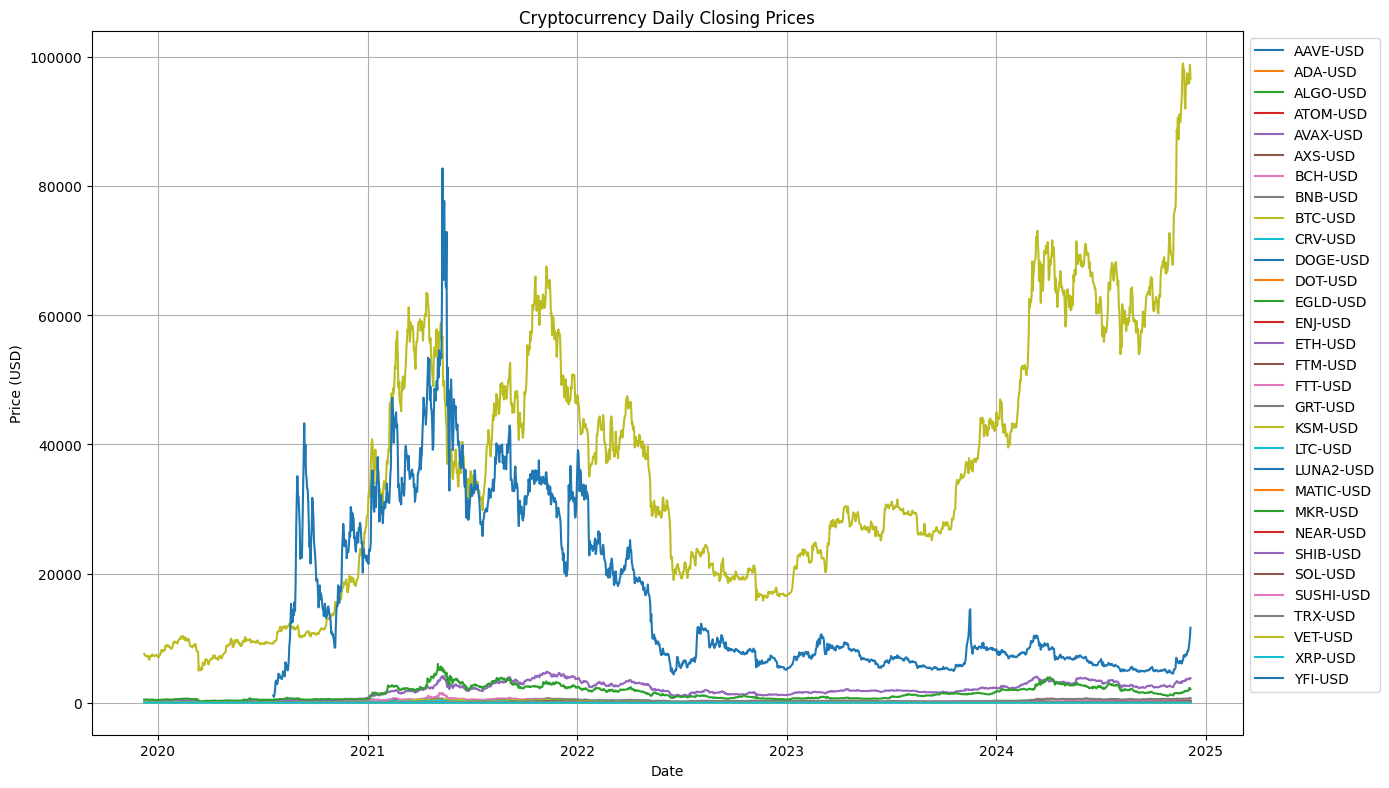

In [ ]:
import matplotlib.pyplot as plt

# Daily Line Plot
plt.figure(figsize=(14, 8))

# Plot each cryptocurrency
for crypto in crypto_data.columns:
    plt.plot(crypto_data.index, crypto_data[crypto], label=crypto)

plt.title('Cryptocurrency Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

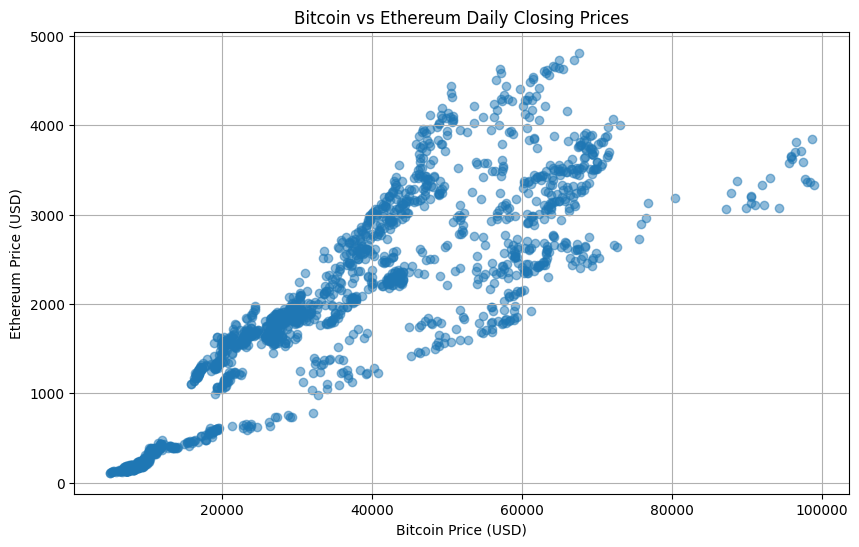

In [ ]:
# Daily Scatter Plot for BTC and ETH
plt.figure(figsize=(10, 6))
plt.scatter(crypto_data['BTC-USD'], crypto_data['ETH-USD'], alpha=0.5)
plt.title('Bitcoin vs Ethereum Daily Closing Prices')
plt.xlabel('Bitcoin Price (USD)')
plt.ylabel('Ethereum Price (USD)')
plt.grid(True)
plt.show()

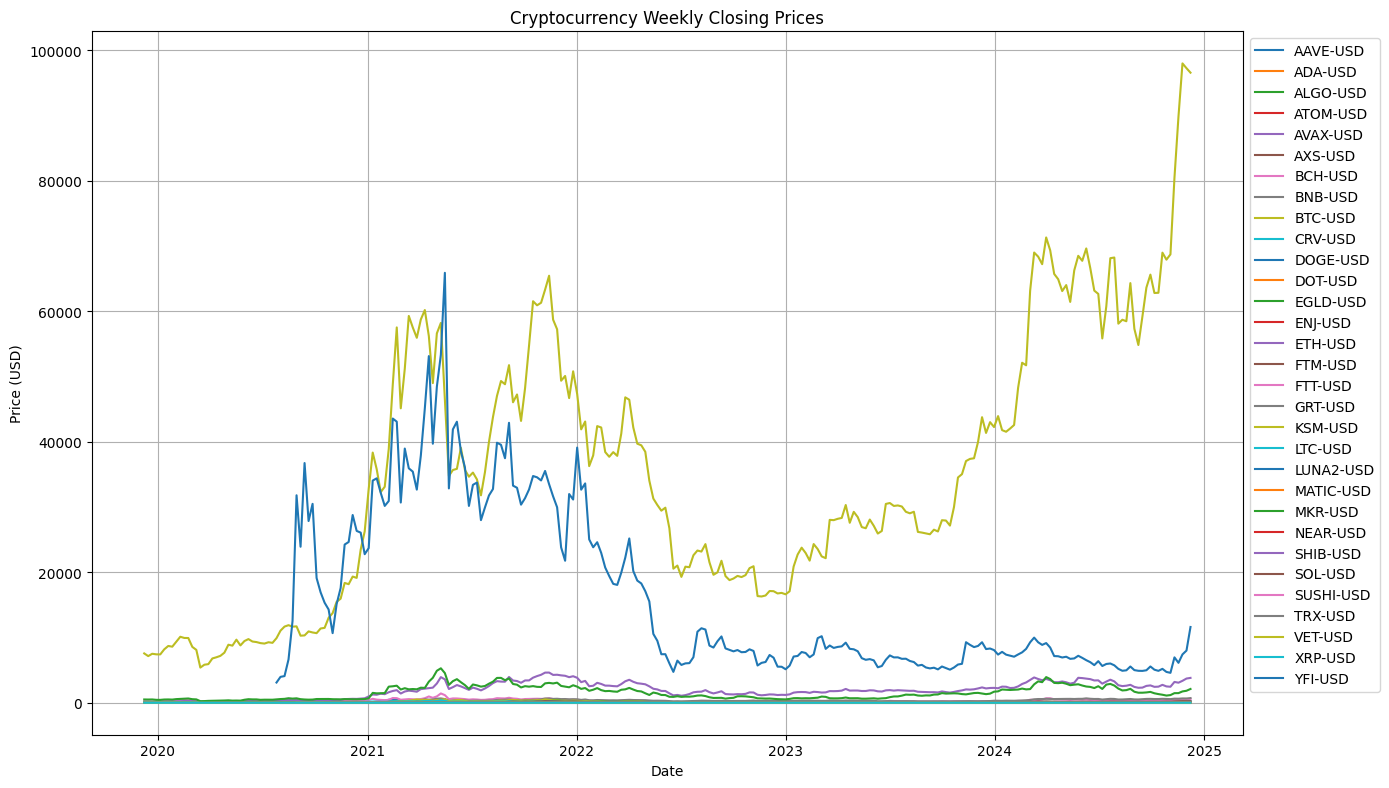

In [ ]:
# Resample the data to weekly frequency, taking the last available value of each week
crypto_weekly_data = crypto_data.resample('W').last()

# Weekly Line Plot
plt.figure(figsize=(14, 8))

# Plot each cryptocurrency on a weekly basis
for crypto in crypto_weekly_data.columns:
    plt.plot(crypto_weekly_data.index, crypto_weekly_data[crypto], label=crypto)

plt.title('Cryptocurrency Weekly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

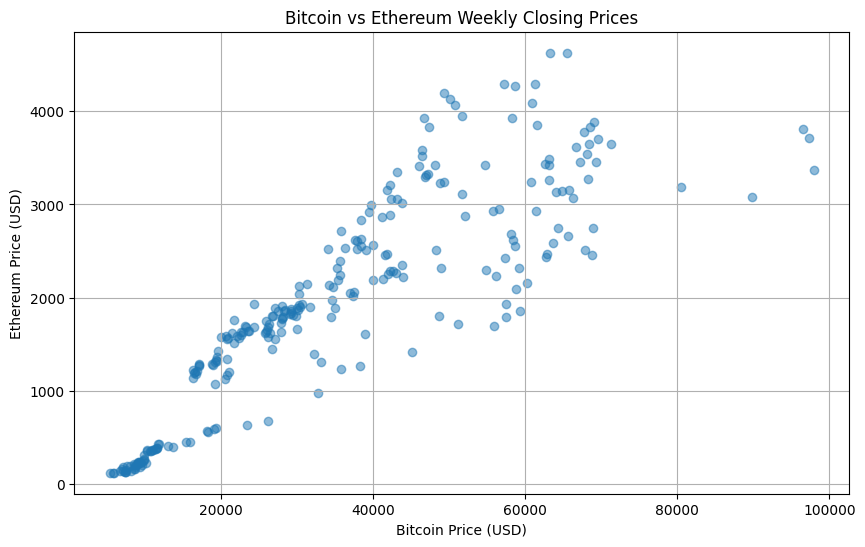

In [ ]:
plt.figure(figsize=(10, 6))



plt.scatter(crypto_weekly_data['BTC-USD'], crypto_weekly_data['ETH-USD'], alpha=0.5)
plt.title('Bitcoin vs Ethereum Weekly Closing Prices')
plt.xlabel('Bitcoin Price (USD)')
plt.ylabel('Ethereum Price (USD)')
plt.grid(True)
plt.show()

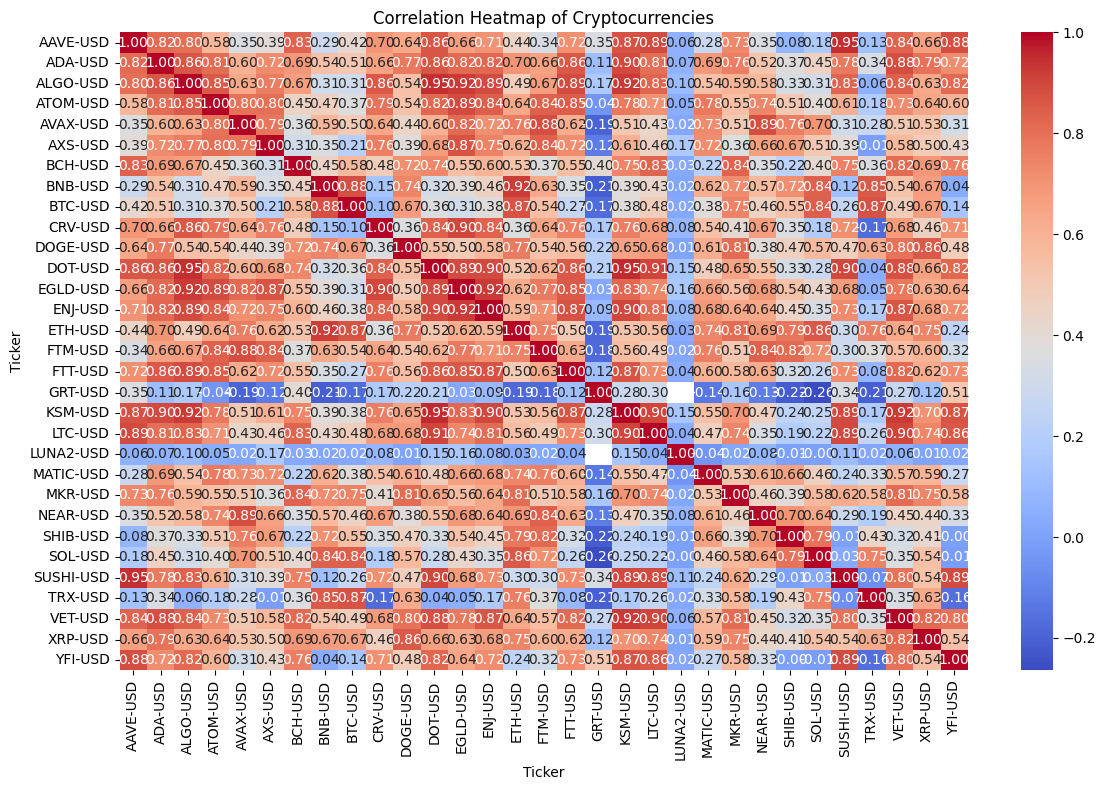

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
crypto_corr = crypto_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crypto_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Cryptocurrencies')
plt.tight_layout()
plt.show()

NameError: name 'y_pred_linear' is not defined

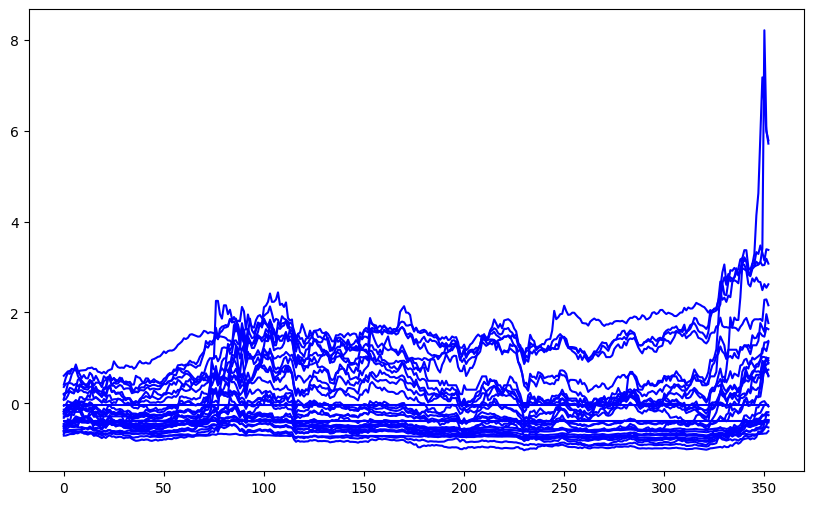

In [ ]:
# Plotting actual vs predicted values for Linear Regression (or any model)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred_linear, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Daily Closing Prices for BTC-USD')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#This example uses Linear Regression for simplicity. You can replace this with Random Forest, LSTM, or ARIMA models for more accurate forecasts.
#You can expand this program to display weekly and yearly forecasts as well. This can be achieved by resampling the data accordingly and then plotting it.

In [ ]:
def get_crypto_data(selected_crypto):
    # Download data for the selected cryptocurrency (last 5 years)
    start_date = (pd.to_datetime('today') - pd.DateOffset(years=5)).strftime('%Y-%m-%d')
    end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

    # Get historical data
    crypto_data = yf.download(selected_crypto, start=start_date, end=end_date)['Close']

    # Handle missing data (forward fill to replace NaNs with previous values)
    crypto_data.fillna(method='ffill', inplace=True)  # Forward fill
    crypto_data.dropna(inplace=True)  # Drop any remaining NaNs

    # Normalize the data (scaling)
    scaler = StandardScaler()
    crypto_data_scaled = scaler.fit_transform(crypto_data.values.reshape(-1, 1))

    return crypto_data, crypto_data_scaled

In [ ]:
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        # Only append rows that don't have NaN values
        if not np.isnan(data[i:i+n_steps]).any() and not np.isnan(data[i+n_steps]).any():
            X.append(data[i:i+n_steps])
            y.append(data[i+n_steps])
    return np.array(X), np.array(y)

Enter the cryptocurrency symbol (e.g., BTC-USD): BTC-USD


[*********************100%***********************]  1 of 1 completed
<ipython-input-27-fbcd2ced08ce>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_data.fillna(method='ffill', inplace=True)  # Forward fill


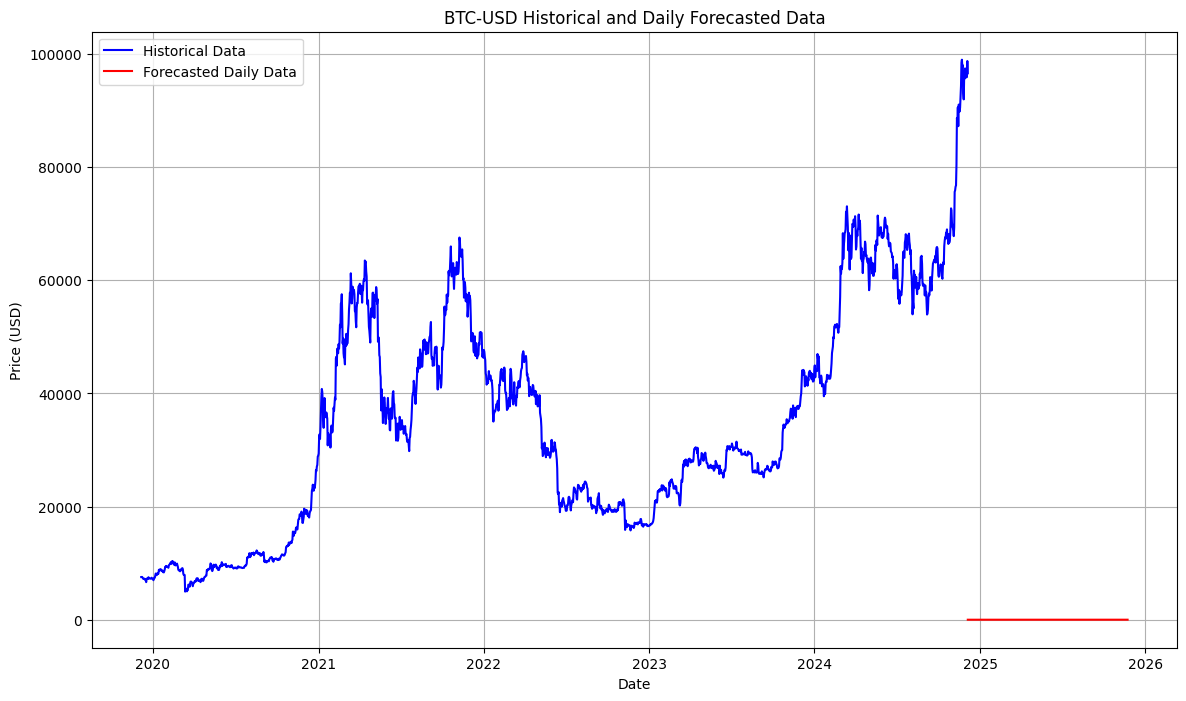

In [ ]:
def get_user_choice():
    """Gets cryptocurrency selection from the user."""
    while True:
        selected_crypto = input("Enter the cryptocurrency symbol (e.g., BTC-USD): ")
        if selected_crypto in cryptos:  # Assuming 'cryptos' is defined globally
            return selected_crypto
        else:
            print("Invalid cryptocurrency symbol. Please choose from the list:", cryptos)

def main():
    # Step 1: Get User Input
    selected_crypto = get_user_choice()

    # Step 2: Get Crypto Data (with NaN handling)
    crypto_data, crypto_data_scaled = get_crypto_data(selected_crypto)

    # Step 3: Forecast with Linear Regression
    forecasted_daily, actual_daily = linear_regression_forecast(crypto_data_scaled)

    # Step 4: Plot Data
    plot_data(selected_crypto, crypto_data, forecasted_daily, actual_daily, forecast_period='daily')

    # Optional: Forecast and plot weekly and yearly data
    # weekly_data = forecast_weekly_yearly(crypto_data, forecasted_daily, period='weekly')
    # plot_data(selected_crypto, crypto_data, weekly_data, actual_daily, forecast_period='weekly')

    # yearly_data = forecast_weekly_yearly(crypto_data, forecasted_daily, period='yearly')
    # plot_data(selected_crypto, crypto_data, yearly_data, actual_daily, forecast_period='yearly')

# Run the program
main()

In [ ]:
def linear_regression_forecast(crypto_data_scaled):
    n_steps = 60  # Use last 60 days for forecasting
    X, y = create_dataset(crypto_data_scaled, n_steps)

    # Remove any NaN values from X or y (should already be handled in `create_dataset`)
    if np.any(np.isnan(X)) or np.any(np.isnan(y)):
        raise ValueError("The dataset contains NaN values after preprocessing.")

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

    # Predictions for daily forecast
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

    return y_pred, y_test

In [ ]:
def plot_data(selected_crypto, crypto_data, forecasted_data_daily, actual_data_daily, forecast_period='daily'):
    plt.figure(figsize=(14, 8))

    # Plot Historical Data
    plt.plot(crypto_data.index, crypto_data, label='Historical Data', color='blue')

    # Plot Forecasted Data
    if forecast_period == 'daily':
        forecast_index = pd.date_range(crypto_data.index[-1], periods=len(forecasted_data_daily), freq='D')
        plt.plot(forecast_index, forecasted_data_daily, label='Forecasted Daily Data', color='red')

    plt.title(f'{selected_crypto} Historical and {forecast_period.capitalize()} Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
streamlite